In [5]:
from greensight.utils import DIR_DATA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import ppscore as pps

In [6]:

path_in = DIR_DATA / "processed_data/sentinel_one_all.hdf"
df = pd.read_hdf(path_in, key="df")
df.head(5)

greenbelt  Bath and Bristol                                              \
band                   soil vegetation      VHAsc      VHDes      VVAsc   
2016-01-01        20.538058   0.874162 -16.733175 -16.754733 -10.486643   
2016-02-01        20.509123   0.863136 -17.161823 -16.413510 -10.859023   
2016-03-01        20.484851   0.860466 -17.129486 -17.055261 -10.753075   
2016-04-01        20.470879   0.866171 -17.229244 -17.733898 -11.471144   
2016-05-01        20.483321   0.875898 -17.807955 -19.625690 -12.296638   

greenbelt             Birmingham                                   ...  \
band            VVDes       soil vegetation      VHAsc      VHDes  ...   
2016-01-01 -10.509499  17.776966   0.839558 -16.396578 -16.594125  ...   
2016-02-01 -10.346636  17.748355   0.830786 -16.698854 -17.373598  ...   
2016-03-01 -10.784869  17.726005   0.828725 -17.272145 -17.537473  ...   
2016-04-01 -11.692585  17.712009   0.834877 -16.868347 -17.510366  ...   
2016-05-01 -14.341092  17.722460   0.844635 -18.095525 -18.818340  ...   

greenbelt  Tyne and Wear                                        York  \
band               VHAsc      VHDes      VVAsc      VVDes       soil   
2016-01-01    -17.173963 -17.287690 -10.386117 -10.202752  16.714644   
2016-02-01    -17.696011 -17.237174 -10.842463 -10.082764  16.689212   
2016-03-01    -18.051715 -18.418969 -11.118283 -11.131899  16.669819   
2016-04-01    -17.966978 -17.678947 -11.647092 -11.250982  16.659543   
2016-05-01    -18.863148 -18.553498 -13.531375 -13.162039  16.672983   

greenbelt                                                          
band       vegetation      VHAsc      VHDes      VVAsc      VVDes  
2016-01-01   0.600891 -19.669240 -17.372143 -13.340954 -10.110974  
2016-02-01   0.593459 -23.956125 -18.290232 -18.802526 -10.731214  
2016-03-01   0.591993 -21.782712 -18.057898 -15.766225 -10.589340  
2016-04-01   0.598759 -22.797279 -17.954725 -17.203952 -11.120891  
2016-05-01   0.610715 -24.500349 -17.940405 -20.327269 -11.872395  

[5 rows x 96 columns]

<Axes: >

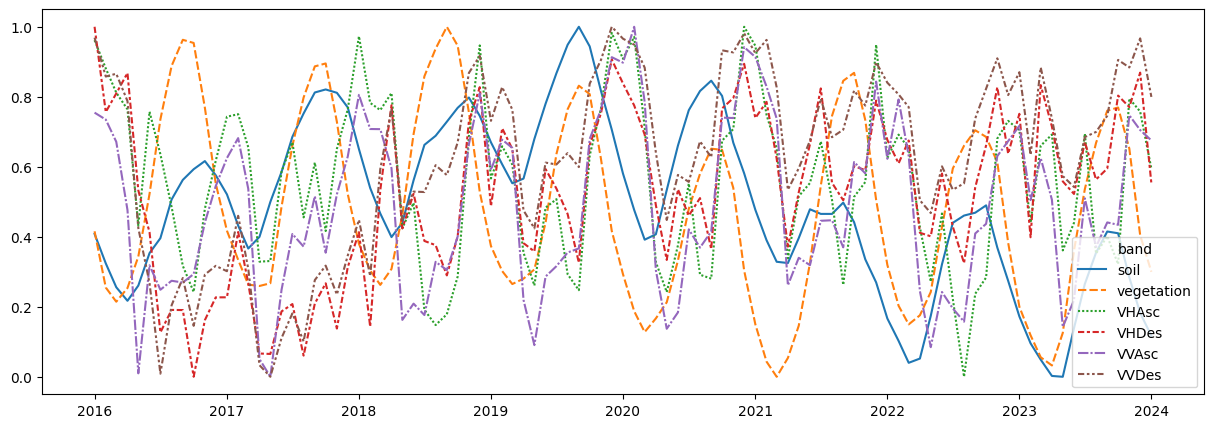

In [13]:
df_gb = df["London"]
df_normalized = (df_gb - df_gb.min()) / (df_gb.max() - df_gb.min())
plt.figure(figsize=[15, 5])
sns.lineplot(df_normalized)

<Axes: xlabel='band', ylabel='band'>

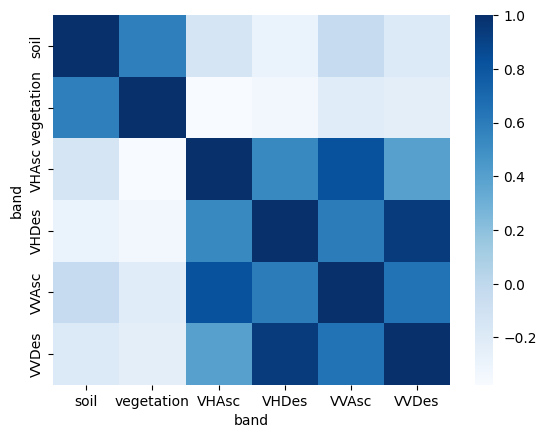

In [14]:
sns.heatmap(df_gb.corr(), cmap="Blues")

<Axes: xlabel='band', ylabel='band'>

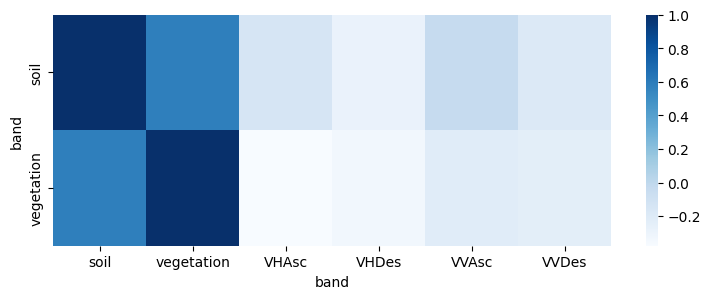

In [15]:
plt.figure(figsize=[9, 3])
sns.heatmap(df_gb.corr()[:2], cmap="Blues")

In [17]:
df_gb.corr()[:2]

band,soil,vegetation,VHAsc,VHDes,VVAsc,VVDes
band,,,,,,
soil,1.000000,0.582016,-0.141658,-0.279472,-0.027167,-0.185668
vegetation,0.582016,1.000000,-0.375862,-0.328281,-0.216490,-0.233583


In [39]:

df_soil_comp = (df_gb.corr()[:2].loc[["soil"]].iloc[:, 2:].T).abs()
df_soil_comp

band,soil
band,
VHAsc,0.141658
VHDes,0.279472
VVAsc,0.027167
VVDes,0.185668


In [45]:
df_sorted = df_soil_comp.sort_values(by="soil", ascending=False)
df_sorted

band,soil
band,
VHDes,0.279472
VVDes,0.185668
VHAsc,0.141658
VVAsc,0.027167


<Axes: xlabel='band'>

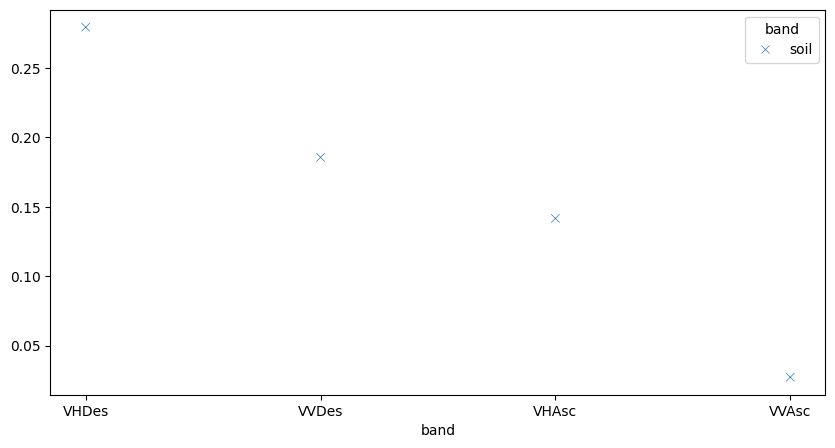

In [49]:
plt.figure(figsize=[10, 5])
sns.scatterplot(df_sorted, markers="x")

In [51]:

df_veg_comp = (df_gb.corr()[:2].loc[["vegetation"]].iloc[:, 2:].T).abs()
df_veg_comp

band,vegetation
band,
VHAsc,0.375862
VHDes,0.328281
VVAsc,0.216490
VVDes,0.233583


In [53]:
df_sorted = df_veg_comp.sort_values(by="vegetation", ascending=False)
df_sorted

band,vegetation
band,
VHAsc,0.375862
VHDes,0.328281
VVDes,0.233583
VVAsc,0.216490


<Axes: xlabel='band'>

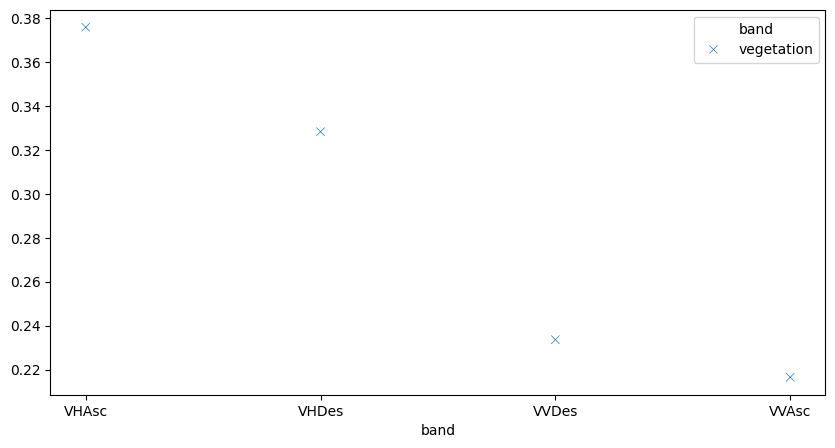

In [54]:
plt.figure(figsize=[10, 5])
sns.scatterplot(df_sorted, markers="x")